<a href="https://colab.research.google.com/github/beridayan/machine_learning_gaming/blob/main/Copy_of_V2_steam_project_final%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir='rtl'>

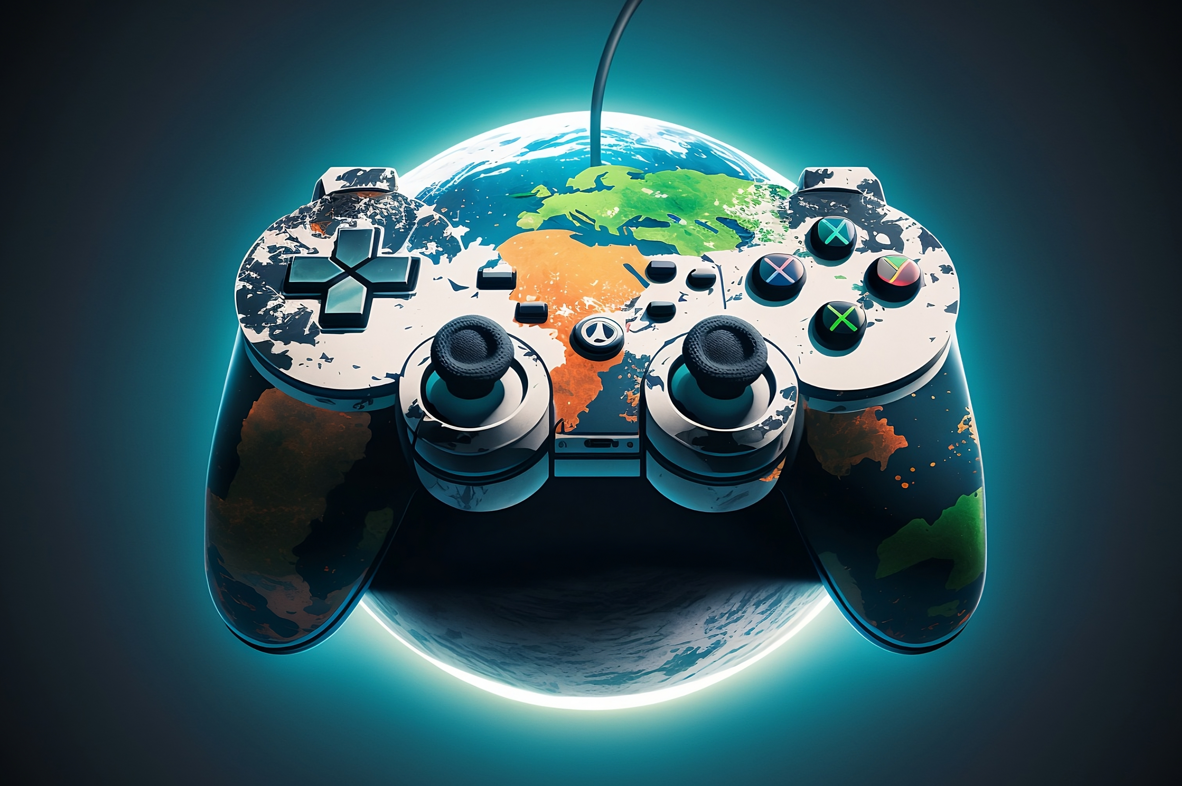

<div dir='rtl'>

**מטרת הפרויקט היא לנבא האם משחק מחשב יהיה בחינם או לא.**
_____________________________________________________
**שם התלמיד :**ברי דיין
_____________________________________________________
**תאריך הגשה**: 18/5/2024
_____________________________________________________
**תיאור הנתונים**: הנתונים נלקחו מאתר בשם steam ששם יש מאות אלפי משחקי מחשב. השגתי את הנתונים באזרת קוד שהכנתי הנקרא web scraper.
_____________________________________________________
**קישור לאתר:** [steam_home_page](https://store.steampowered.com/)
_____________________________________________________
עמודות הנתונים הסופיות:

**Name** - השם של אותו משחק

**Is_Free** - אם המשחק בחינם או לא

**Amount_of_reviews** - כמות הצפיות לאותו משחק

**Realise_date** - תאריך הוצאה לאור

**Is_Online** - האם כמה שחקנים יכולים להתחבר לאותו שרת ולשחק ביחד

**Is_Shooter** - האם במשחק יש יריות ונשקים

**IS_FPS**- האם המשחק בגוף ראשון

**Supports_more_then_3_languages** - האם המשחק תומך ביותר משלוש שפות

**0-20** - זו היא שיטה שמחלקת את העמודה genre  ל20 עמודות שבעזרתם אפשר לדעת את
כמות ה ג'נרות של המשחק ואיזה ג'נרות לפי מספרם

<div dir='rtl'>

# **קוד הלוקח את הנתונים מהאתר סטים**



In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from google.colab import files




def get_data(url):
    s = requests.Session()
    s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'
    response = s.get(url)
    return response.text

def parse(data):
    games_data = []

    soup = BeautifulSoup(data, 'html.parser')
    names = soup.find_all('div', {'class': 'apphub_AppName'})

    for name in names:
        title = name.text.strip()

        genre_links = name.find_all_next('a', {'class': 'app_tag'})
        game_types = [link.text.strip() for link in genre_links]

        date = soup.find_all('div', {'class': 'date'})
        date_type = date[0].text.strip() if date else ''

        reviews = soup.find_all('span', {'class': 'responsive_hidden'})

        filtered_reviews = [review.text.strip() for review in reviews]

        if len(filtered_reviews) == 3:
            review_type = reviews[1].text.strip()
        elif len(filtered_reviews) == 2:
            review_type = reviews[0].text.strip()
        else:
            review_type = None

        dev_links = soup.find_all('div', {'class': 'dev_row'})
        dev_types = [link.text.strip().replace('Developer:\n\n', '').replace('Developer:\n', '') for link in dev_links if 'Developer' in link.text.strip()]
        filtered_developers = ', '.join(set(developer.strip() for developer in dev_types if developer.lower() != ''))


        #להוסיף למקרים שהמשחק לא נמכר יותר אז לכתוב שהוא לא נמכר יותר במחיר
        price_element = soup.find('div', {'class': 'game_purchase_price price'})
        price_text = price_element.text.strip() if price_element else ""

        label = soup.find_all('a', {'class': 'app_tag'})

        is_online_text = [tag.text.strip() for tag in label] if label else []

        if "Multiplayer" in is_online_text:
            is_online_text = "1"
        else:
            is_online_text = "0"

        is_Shooter_text = [tag.text.strip() for tag in label] if label else []

        if "Shooter" in is_Shooter_text:
            is_shooter = "1"
        else:
            is_shooter = "0"

        is_Fps_text = [tag.text.strip() for tag in label] if label else []
        if "FPS" in is_Fps_text:
            is_FPS = "1"
        else:
            is_FPS = "0"

        languges = soup.find_all('td', {'class': 'ellipsis'})
        languges_text = [tag.text.strip() for tag in languges] if languges else []
        if len(languges_text) >= 4:
            is_Multipel_languges = "1"
        else:
            is_Multipel_languges = "0"


        games_data.append({'Name': title, 'Price': price_text, 'Genre': game_types, 'Developers': filtered_developers, 'Amount_of_reviews': review_type, 'Realise_date': date_type , 'Is_Online' : is_online_text , 'Is_Shooter' : is_shooter, 'IS_FPS':is_FPS , 'Supports_more_then_3_languages' : is_Multipel_languges})

    return games_data

all_games_data = []
##12000 - 13000 יש וירוס שחוסם את הקוד
for start in range(10,900301, 10):
    url = f"https://store.steampowered.com/app/{start}"
    data = get_data(url)
    if data:
        all_games_data.extend(parse(data))
        print(start)


df = pd.DataFrame(all_games_data)
df['Genre'] = df['Genre'].apply(tuple)

df = df.drop_duplicates(subset=['Name', 'Price', 'Genre', 'Developers'])

df.to_csv('steam_games_data.csv', index=False)
files.download('steam_games_data.csv')

print(df.head())


<div dir='rtl'>

ניסיתי שיטה שונה אך לא היה מספיק מידע בעמוד




In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from google.colab import files

x = 0
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36'
}

def get_data(url):
    response = requests.get(url, headers=headers)
    data = dict(response.json())
    return data['results_html']

def parse(data):
    global x
    games_data = []

    soup = BeautifulSoup(data, 'html.parser')
    names = soup.find_all('a')

    for name in names:
        title_element = name.find('span', {'class': 'title'})
        price_element = name.find('div', {'class': 'discount_final_price'})
        x += 1

        if title_element and price_element:
            title = title_element.text.strip()
            price = price_element.text.strip()
            games_data.append({'Name': title, 'Price': price})

    return games_data

all_games_data = []
for start in range(0, 6401, 50):
    url = f"https://store.steampowered.com/search/results/?query&start={start}&count=50&dynamic_data=&sort_by=_ASC&supportedlang=english&snr=1_7_7_7000_7&filter=topsellers&infinite=1"
    all_games_data.extend(parse(get_data(url)))

df = pd.DataFrame(all_games_data)

df.to_csv('steam_games_data.csv', index=False)

files.download('steam_games_data.csv')

print(df)






<div dir='rtl'>

# **השגת רשימת מפתחים**




<div dir='rtl'>

ניסיתי להשתמש בזה כדי שיהיה לי רשימה מלאה של כל המפתחים אבל בסוף שימוש בזה רק הוריד לי את הדיוק



In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
from google.colab import files




def get_data(url):
    s = requests.Session()
    s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'
    response = s.get(url)
    return response.text

import json

def parse(data):
    games_data = []

    json_data = json.loads(data)
    if 'results_html' in json_data:
        soup = BeautifulSoup(json_data['results_html'], 'html.parser')
        names = soup.find_all('div', {'class': 'highlighted_app_curator_name'})
        for name in names:
            title = name.text.strip()
            games_data.append({'Name': title})

    return games_data
all_games_data = []

for start in range(0, 13565, 24):
    url = f"https://store.steampowered.com/curators/ajaxgettopcreatorhomes/render/?query=&start={start}&count=24"
    data = get_data(url)
    if data:
        all_games_data.extend(parse(data))
        print(start)

dev = pd.DataFrame(all_games_data)


dev.to_csv('steam_games_data.csv', index=False)
files.download('steam_games_data.csv')

print(dev.head())


<div dir='rtl'>

# **הבאת נתונים**




In [ ]:

pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/steam_scraping_data/‏‏steam_games_data (1+2+3+4+5).csv', encoding='ISO-8859-1')


In [ ]:
df.head()

,Name,Price,Genre,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
0,Atari Vault,NaN,"('Retro', 'Classic', 'Arcade', 'Adventure', 'C...",Code Mystics,-879,"Mar 24, 2016",0,0,0,1
1,Cloney,Free to Play,"('Free to Play', 'Casual', 'Indie')",dotBunny,-272,"Mar 15, 2014",0,0,0,0
2,ShareX,Free,"('Photo Editing', 'Utilities', 'Free to Play',...",ShareX Team,"-6,340","Oct 15, 2007",0,0,0,1
3,Cakewalk - Gibson Bass Collection Expansion,NaN,"('Audio Production',)",Craig Anderton,NaN,"Dec 9, 2016",0,0,0,0
4,Soul Shards,NaN,"('Action', 'Free to Play', 'Early Access', 'In...","Psion Tech, S.A.",NaN,ãöî-24,0,0,0,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Is_Online,23533.0,0.100455,0.300612,0.0,0.0,0.0,0.0,1.0
Is_Shooter,23533.0,0.059066,0.235753,0.0,0.0,0.0,0.0,1.0
IS_FPS,23533.0,0.041814,0.200167,0.0,0.0,0.0,0.0,1.0
Supports_more_then_3_languages,23533.0,0.273573,0.445802,0.0,0.0,0.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23533 entries, 0 to 23532
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Name                            23529 non-null  object
 1   Price                           18687 non-null  object
 2   Genre                           23533 non-null  object
 3   Developers                      22073 non-null  object
 4   Amount_of_reviews               13493 non-null  object
 5   Realise_date                    23437 non-null  object
 6   Is_Online                       23533 non-null  int64 
 7   Is_Shooter                      23533 non-null  int64 
 8   IS_FPS                          23533 non-null  int64 
 9   Supports_more_then_3_languages  23533 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [ ]:
df.nunique()

Name                              23222
Price                               355
Genre                             15667
Developers                        12624
Amount_of_reviews                  2378
Realise_date                       3660
Is_Online                             2
Is_Shooter                            2
IS_FPS                                2
Supports_more_then_3_languages        2
dtype: int64

<div dir='rtl'>

# **ניקוי נתונים**




In [ ]:
df.head()

,Name,Price,Genre,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
0,Atari Vault,NaN,"('Retro', 'Classic', 'Arcade', 'Adventure', 'C...",Code Mystics,-879,"Mar 24, 2016",0,0,0,1
1,Cloney,Free to Play,"('Free to Play', 'Casual', 'Indie')",dotBunny,-272,"Mar 15, 2014",0,0,0,0
2,ShareX,Free,"('Photo Editing', 'Utilities', 'Free to Play',...",ShareX Team,"-6,340","Oct 15, 2007",0,0,0,1
3,Cakewalk - Gibson Bass Collection Expansion,NaN,"('Audio Production',)",Craig Anderton,NaN,"Dec 9, 2016",0,0,0,0
4,Soul Shards,NaN,"('Action', 'Free to Play', 'Early Access', 'In...","Psion Tech, S.A.",NaN,ãöî-24,0,0,0,0


In [ ]:
df['Price'] = df['Price'].replace(['Free',"Free to Play"], 1)


In [ ]:
df.dropna(inplace=True)


In [ ]:
df['Price'] = df['Price'].apply(lambda x: 0 if x != 1 else x)


In [ ]:
df.head()

,Name,Price,Genre,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,"('Free to Play', 'Casual', 'Indie')",dotBunny,-272,"Mar 15, 2014",0,0,0,0
2,ShareX,1,"('Photo Editing', 'Utilities', 'Free to Play',...",ShareX Team,"-6,340","Oct 15, 2007",0,0,0,1
5,Out of Space,0,"('Casual', 'Strategy', 'Indie', 'Multiplayer',...",Behold Studios,"-1,706","Feb 26, 2020",1,0,0,1
6,Else Heart.Break(),0,"('Programming', 'Adventure', 'Indie', 'RPG', '...","Erik SvedÃ¤ng, El Huervo / Niklas Ã kerblad, T...",-290,"Sep 24, 2015",0,0,0,0
8,Freedom Poopie,0,"('Indie', 'Platformer')",Electroplasmatic Games,-10,"Oct 16, 2015",0,0,0,1


In [ ]:
df.rename(columns={'Price': 'Is_Free'}, inplace=True)


In [ ]:
df['Amount_of_reviews'] = df['Amount_of_reviews'].str.replace('-', '')

In [ ]:
def convert_date(date_string):
    months = {
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }

    for month_name, month_number in months.items():
        if month_name in date_string:
            modified_date = date_string.replace(month_name, '').strip()  # Remove month name and leading/trailing spaces
            parts = modified_date.split(',')  # Split into parts
            day = int(parts[0].strip())  # Extract and convert day to integer
            year = int(parts[1].strip())  # Extract and convert year to integer
            return int(f"{month_number:02d}{day}{year}")  # Combine month, day and year into a single integer

    return None

df["Realise_date"] = df["Realise_date"].apply(convert_date)


In [ ]:
df.head()

,Name,Is_Free,Genre,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,"('Free to Play', 'Casual', 'Indie')",dotBunny,272,3152014.0,0,0,0,0
2,ShareX,1,"('Photo Editing', 'Utilities', 'Free to Play',...",ShareX Team,"6,340",10152007.0,0,0,0,1
5,Out of Space,0,"('Casual', 'Strategy', 'Indie', 'Multiplayer',...",Behold Studios,"1,706",2262020.0,1,0,0,1
6,Else Heart.Break(),0,"('Programming', 'Adventure', 'Indie', 'RPG', '...","Erik SvedÃ¤ng, El Huervo / Niklas Ã kerblad, T...",290,9242015.0,0,0,0,0
8,Freedom Poopie,0,"('Indie', 'Platformer')",Electroplasmatic Games,10,10162015.0,0,0,0,1


In [ ]:
import json

df['Genre'] = df['Genre'].str.replace("'", '"')


genre_lists = df['Genre'].tolist()
import re

def convert_to_list(string):
    return re.findall(r'"([^"]*)"', string)

df['Genre'] = df['Genre'].apply(convert_to_list)

genre_lists = df['Genre'].tolist()

In [ ]:
df.head()

,Name,Is_Free,Genre,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,"[Free to Play, Casual, Indie]",dotBunny,272,3152014.0,0,0,0,0
2,ShareX,1,"[Photo Editing, Utilities, Free to Play, Video...",ShareX Team,"6,340",10152007.0,0,0,0,1
5,Out of Space,0,"[Casual, Strategy, Indie, Multiplayer, Co-op, ...",Behold Studios,"1,706",2262020.0,1,0,0,1
6,Else Heart.Break(),0,"[Programming, Adventure, Indie, RPG, Hacking, ...","Erik SvedÃ¤ng, El Huervo / Niklas Ã kerblad, T...",290,9242015.0,0,0,0,0
8,Freedom Poopie,0,"[Indie, Platformer]",Electroplasmatic Games,10,10162015.0,0,0,0,1


In [ ]:
literature_list = [
    "Indie", "Action", "Adventure", "Casual", "RPG", "Simulation", "Strategy",
    "Singleplayer", "Early Access", "Free to Play", "2D", "3D", "Atmospheric",
    "Fantasy", "Colorful", "Story Rich", "Multiplayer", "Puzzle", "Exploration",
    "Pixel Graphics", "Cute", "Massively Multiplayer", "Sports", "Combat",
    "First-Person", "Violent", "Action-Adventure", "Funny", "Arcade", "Anime",
    "Racing", "Sci-fi", "Sexual Content", "Relaxing", "Nudity", "Shooter",
    "Horror", "Controller", "Family Friendly", "Third Person", "Retro", "Stylized",
    "Gore", "Female Protagonist", "Open World", "Co-op", "Survival", "Platformer",
    "PvP", "Top-Down", "Choices Matter", "PvE", "Realistic", "Comedy", "Dark",
    "Visual Novel", "Character Customization", "Cartoony", "Linear", "Mystery",
    "Physics", "Multiple Endings", "2D Platformer", "Online Co-Op", "FPS",
    "Old School", "Psychological Horror", "Magic", "Difficult", "Sandbox",
    "Tactical", "Medieval", "Action RPG", "VR", "Minimalist", "Futuristic",
    "Building", "Hand-drawn", "Space", "Great Soundtrack", "Roguelike", "Crafting",
    "Point & Click", "Management", "Drama", "Roguelite", "Cartoon", "Shoot 'Em Up",
    "Dark Fantasy", "Procedural Generation", "Local Multiplayer", "3D Platformer",
    "Resource Management", "Logic", "Side Scroller", "Choose Your Own Adventure",
    "Survival Horror", "Design & Illustration", "Romance", "Mature", "Emotional",
    "Immersive Sim", "Education", "Turn-Based Combat", "Puzzle Platformer",
    "Hack and Slash", "Nature", "Action Roguelike", "Turn-Based Strategy",
    "Interactive Fiction", "Hentai", "Utilities", "Turn-Based Tactics", "Base Building",
    "1980s", "Post-apocalyptic", "War", "Zombies", "Dating Sim", "Tabletop",
    "Hidden Object", "1990's", "Bullet Hell", "Surreal", "JRPG", "Dungeon Crawler",
    "Local Co-Op", "Stealth", "Walking Simulator", "Score Attack", "Historical",
    "Narration", "Party-Based RPG", "NSFW", "Cinematic", "Replay Value", "Conversation",
    "Text-Based", "Turn-Based", "Third-Person Shooter", "Military", "LGBTQ+", "2.5D",
    "Top-Down Shooter", "Investigation", "Aliens", "Isometric", "Robots", "Cyberpunk",
    "Nonlinear", "Lore-Rich", "Team-Based", "Inventory Management", "Dark Humor",
    "Card Game", "Life Sim", "Demons", "Tutorial", "Memes", "Web Publishing",
    "Strategy RPG", "Clicker", "Psychological", "Thriller", "Artificial Intelligence",
    "RTS", "Real Time Tactics", "Abstract", "Economy", "Supernatural", "Arena Shooter",
    "Perma Death", "Detective", "Driving", "Modern", "Board Game", "Precision Platformer",
    "Dystopian", "Time Management", "Tower Defense", "Loot", "Psychedelic", "Software",
    "Fast-Paced", "Animation & Modeling", "Tactical RPG", "Short", "Souls-like",
    "City Builder", "4 Player Local", "Comic Book", "Flight", "Alternate History",
    "Wargame", "Beat 'em up", "Collectathon", "Metroidvania", "Destruction",
    "Soundtrack", "Mythology", "Music", "Game Development", "Deckbuilding",
    "Moddable", "RPGMaker", "Classic", "Level Editor", "Runner", "Idler", "Parkour",
    "Grid-Based Movement", "Crime", "CRPG", "2D Fighter", "Fighting", "Class-Based",
    "Movie", "Card Battler", "Experimental", "MMORPG", "Dark Comedy", "Beautiful",
    "Video Production", "Philosophical", "Gun Customization", "Competitive", "Cats",
    "Automobile Sim", "Audio Production", "Science", "Twin Stick Shooter", "Rhythm",
    "Capitalism", "Co-op Campaign", "Vehicular Combat", "Swordplay", "World War II",
    "Creature Collector", "3D Fighter", "Lovecraftian", "Automation", "Dragons",
    "Grand Strategy", "Battle Royale", "Space Sim", "America", "eSports", "Conspiracy",
    "Split Screen", "6DOF", "3D Vision", "Noir", "Farming Sim", "Match 3", "Trading",
    "Parody", "Colony Sim", "Quick-Time Events", "Mystery Dungeon", "Bullet Time",
    "Satire", "Software Training", "Cooking", "Dynamic Narration", "Hero Shooter",
    "Blood", "Looter Shooter", "Open World Survival Craft", "Gothic", "Agriculture",
    "Time Manipulation", "Combat Racing", "Word Game", "Underground", "Martial Arts",
    "Spectacle fighter", "Voxel", "Character Action Game", "Mining", "Mechs",
    "Steampunk", "Political", "Time Travel", "Auto Battler", "Pirates", "Dog",
    "Otome", "Hunting", "Illuminati", "Solitaire", "Addictive", "Immersive",
    "God Game", "Vampire", "Asynchronous Multiplayer", "Action RTS", "Ninja", "FMV",
    "Tanks", "Fishing", "MOBA", "Trading Card Game", "Hex Grid", "Narrative", "Hacking",
    "Cozy", "Remake", "Politics", "Assassin", "Photo Editing", "Underwater", "Faith",
    "Mouse only", "Superhero", "4X", "Dinosaurs", "Cold War", "Wholesome",
    "Transportation", "Real-Time", "Sokoban", "Episodic", "Programming", "Political Sim",
    "Party Game", "Heist", "Western", "Party", "Cult Classic", "Epic", "Diplomacy",
    "Archery", "Trains", "Roguelike Deckbuilder", "Naval", "Gambling", "Minigames",
    "Foreign", "Snow", "Naval Combat", "Typing", "Transhumanism", "Escape Room",
    "Real-Time with Pause", "Traditional Roguelike", "Sailing", "Villain Protagonist",
    "Sniper", "Horses", "Dungeons & Dragons", "Trivia", "On-Rails Shooter", "Offroad",
    "Music-Based Procedural Generation", "Touch-Friendly", "Time Attack", "Nostalgia",
    "Werewolves", "Sequel", "Mars", "Mod", "Kickstarter", "Football (Soccer)", "Farming",
    "World War I", "Boomer Shooter", "360 Video", "Experience", "GameMaker", "Boxing",
    "Jet", "Gaming", "Games Workshop", "Spaceships", "Outbreak Sim", "Chess", "Spelling",
    "Motorbike", "Dwarf", "Unforgiving", "LEGO", "Bikes", "Roguevania", "Golf",
    "Medical Sim", "Documentary", "Asymmetric VR", "Rome", "Submarine", "Silent Protagonist",
    "Electronic Music", "Basketball", "Ambient", "Social Deduction", "Crowdfunded",
    "Pinball", "Instrumental Music", "Football (American)", "Skateboarding", "Mini Golf",
    "Jump Scare", "Wrestling", "Warhammer 40K", "TrackIR", "Rock Music", "Pool",
    "Cycling", "Vikings", "Baseball", "Skating", "Based On A Novel", "Tennis",
    "Job Simulator", "Intentionally Awkward Controls", "Boss Rush", "Motocross", "Lemmings",
    "Tile-Matching", "8-bit Music", "Bowling", "Well-Written", "Extraction Shooter",
    "Hockey", "Hardware", "ATV", "Snowboarding", "BMX", "Skiing", "Steam Machine",
    "Benchmark", "Mahjong", "Electronic", "Elf", "Voice Control", "Birds", "Musou",
    "Shop Keeper", "Fox", "Feature Film", "Coding", "Rugby", "Hobby Sim", "Cricket",
    "Volleyball", "Reboot", "Snooker"
]


def check_tags(tags_list):
    indices = []
    for tag in tags_list:
        if tag in literature_list:
            indices.append(literature_list.index(tag))
        else:
            indices.append(-1)
    return indices


df['Genre'] = df['Genre'].apply(check_tags)

In [ ]:
literature_list = df["Developers"].tolist()

def check_tags(tag):
    if tag in literature_list:
        return literature_list.index(tag)
    else:
        return -1

df['Developers'] = df['Developers'].apply(check_tags)


In [ ]:
df.head()

,Name,Is_Free,Genre,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,"[9, 3, 0]",0,272,3152014.0,0,0,0,0
2,ShareX,1,"[309, 111, 9, 222, 182, 97, 159, 228, 32]",1,"6,340",10152007.0,0,0,0,1
5,Out of Space,0,"[3, 6, 0, 16, 45, 126, 78, 63, 90, 189, 37, 27...",2,"1,706",2262020.0,1,0,0,1
6,Else Heart.Break(),0,"[322, 2, 0, 4, 304, 7, 12, 148, 123, 79, 82, 2...",3,290,9242015.0,0,0,0,0
8,Freedom Poopie,0,"[0, 47]",4,10,10162015.0,0,0,0,1


In [ ]:
df['Amount_of_reviews'] = df['Amount_of_reviews'].str.replace(',', '').astype(float).fillna(df['Amount_of_reviews'].str.replace(',', '').astype(float).mean()).astype(int)
df['Developers'] = df['Developers'].astype(float).fillna(df['Developers'].astype(float).mean()).astype(int)


In [ ]:
df.dropna(subset=['Realise_date'], inplace=True)
df['Realise_date'] = df['Realise_date'].astype(int)


In [ ]:
df = df.drop(['Genre'] , axis = 1)

In [ ]:
df

,Name,Is_Free,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,0,272,3152014,0,0,0,0
2,ShareX,1,1,6340,10152007,0,0,0,1
5,Out of Space,0,2,1706,2262020,1,0,0,1
6,Else Heart.Break(),0,3,290,9242015,0,0,0,0
8,Freedom Poopie,0,4,10,10162015,0,0,0,1
...,...,...,...,...,...,...,...,...,...
23525,BREATHE,1,0,363,2192018,1,0,0,0
23526,Neko Dungeon | åµé ±è¿·å | åµé¬è¿·å | ã...,0,11551,33,8172018,0,0,0,1
23527,REVENGER: Age of Morons,0,11361,14,2202018,0,0,0,0
23530,Car Mechanic Simulator 2018 - Garage Customiza...,1,1008,191,2202018,0,0,0,1



<div dir='rtl'>

# **גרפים**



<ipython-input-143-a546e8dff333>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Free', y='Is_Online', data=df,palette='tab10');


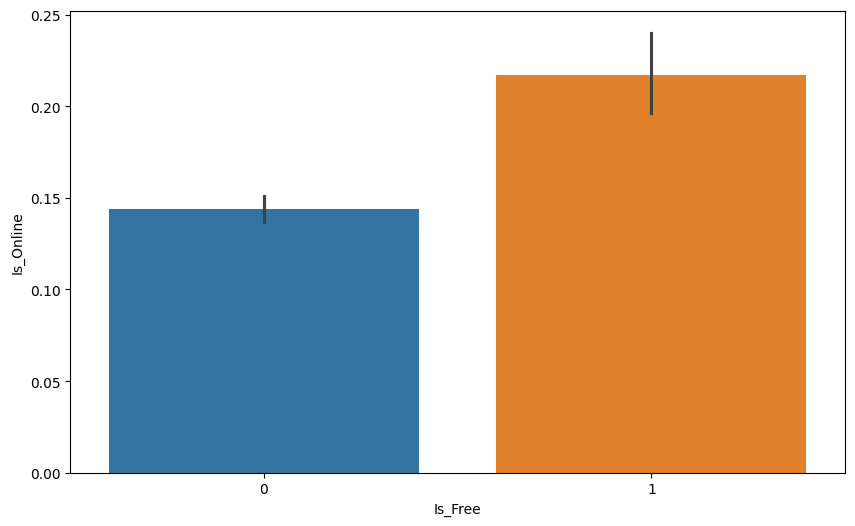

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Is_Free', y='Is_Online', data=df,palette='tab10');

<div dir='rtl'>

**:מסקנה**

המשחקים החינמיים בדרך כלל אונליין


<ipython-input-144-0cc9e3681cd7>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(x='Is_Free',y='Supports_more_then_3_languages',data=df, scale = "area");


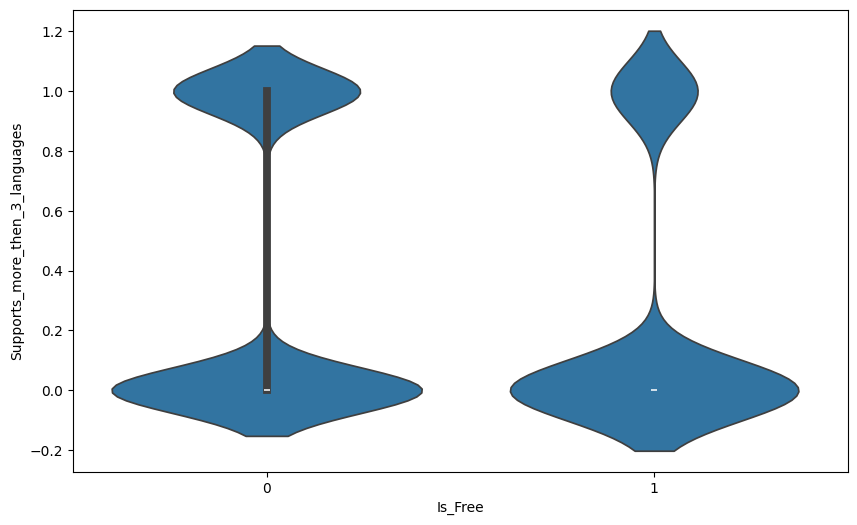

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x='Is_Free',y='Supports_more_then_3_languages',data=df, scale = "area");

<div dir='rtl'>

**:מסקנה**

המשחקים החינמיים הם אלה שתומכים ביותר שפות

<ipython-input-145-bd8e345edf1b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Shooter', y='IS_FPS', data=df,palette='tab10');


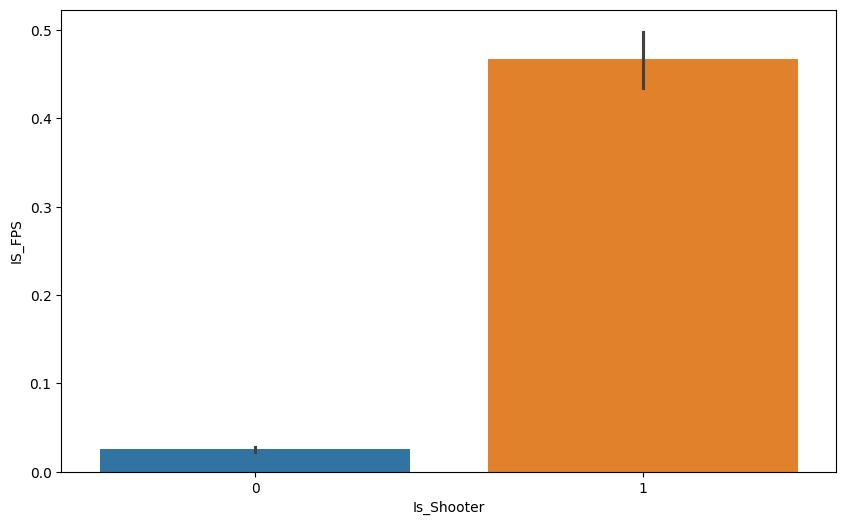

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Is_Shooter', y='IS_FPS', data=df,palette='tab10');

<div dir='rtl'>

**:מסקנה**

כמעט כל המשחקים שיש בהם רובים הם מגוף ראשון

<ipython-input-146-7af446517c90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Free', y='IS_FPS', data=df,palette='tab10');


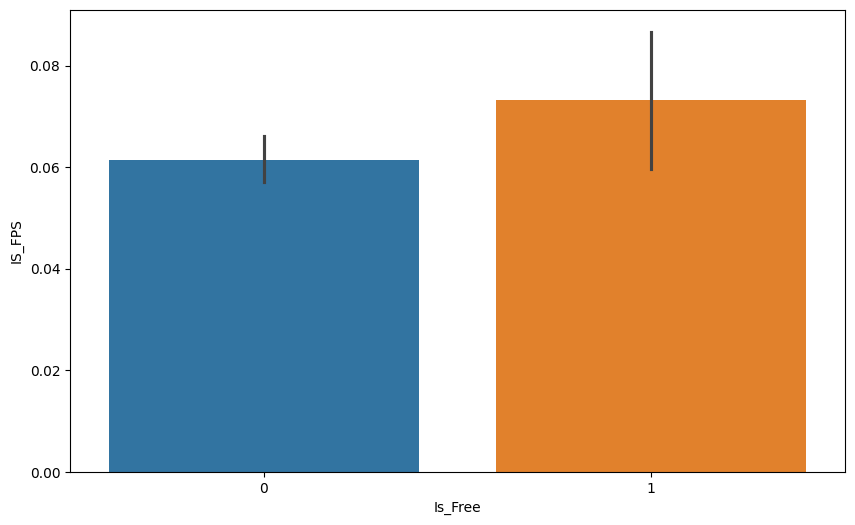

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Is_Free', y='IS_FPS', data=df,palette='tab10');

<div dir='rtl'>

**:מסקנה**

רוב המשחקים שהם בגוף ראשון הם בחינם


<ipython-input-147-d46e3bf169fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_Online', y='Supports_more_then_3_languages', data=df,palette='tab10');


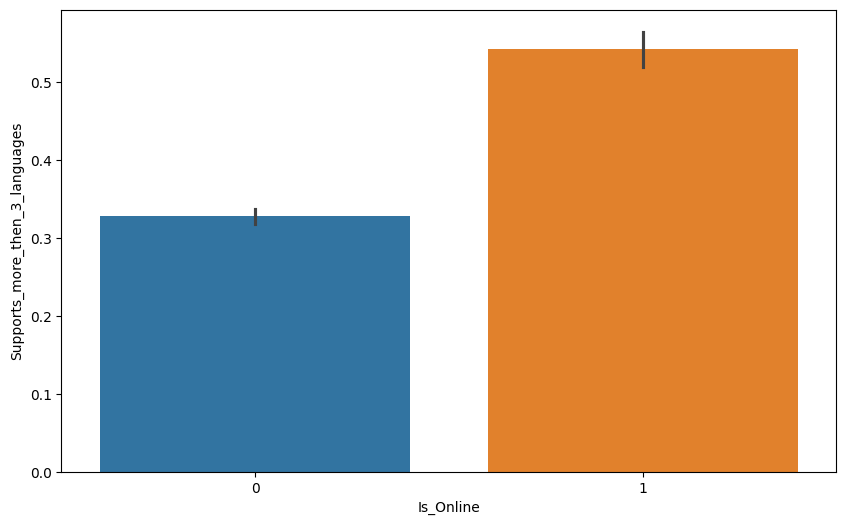

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='Is_Online', y='Supports_more_then_3_languages', data=df,palette='tab10');

רוב המשחקים שהם אונליין הם תומכים ביותר משלוש שפות ( זה הגיוני כיוון שבאונליין אנשים מתחברים מבל רחבי העולם עם שפות שונות)

<div dir='rtl'>

# **KNN_V1**



In [ ]:
df.head()

,Name,Is_Free,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,0,272,3152014,0,0,0,0
2,ShareX,1,1,6340,10152007,0,0,0,1
16,StarForce 2193: The HotepÂ® Controversy,1,10,10,8162016,0,0,0,0
53,Ultimate Rock Crawler,1,33,37,1252016,0,0,0,0
80,Legena: Union Tides,1,47,24,1082015,0,0,0,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df[['Realise_date', 'Developers', 'Amount_of_reviews', 'Is_Online', 'IS_FPS', 'Supports_more_then_3_languages']]
X.columns = X.columns.astype(str)
y = df['Is_Free']
target_names = ['1', '0']

# ספרייה
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=41)

In [ ]:
print(f"X Shape: \t{X.shape},\t y Shape: \t{y.shape}" )
print(f"X_train Shape: \t{X_train.shape},\t y_train Shape: {y_train.shape}" )
print(f"X_test Shape: \t{X_test.shape},\t y_test Shape: \t{y_test.shape}" )

X Shape: 	(7083, 6),	 y Shape: 	(7083,)
X_train Shape: 	(5666, 6),	 y_train Shape: (5666,)
X_test Shape: 	(1417, 6),	 y_test Shape: 	(1417,)


<div dir='rtl'>

## **מטריצת בלבול**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm= 'brute',n_neighbors=1,weights='distance')
neigh.fit(X_train, y_train)
classifier = neigh


y_pred =  neigh.predict(X_test)
title = "steam - KNN Confusion Matrix"
print(title)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

steam - KNN Confusion Matrix


array([[973, 200],
       [186,  58]])

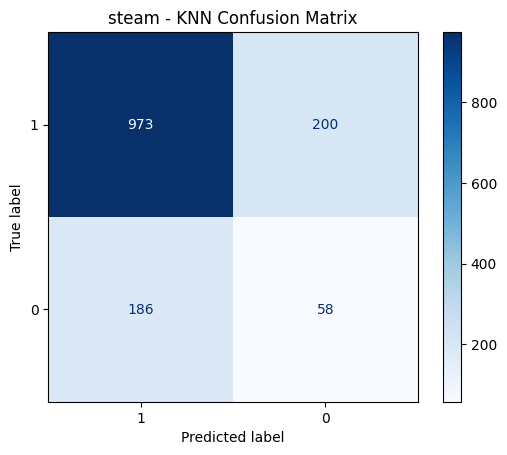

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title(title)
plt.show()

In [ ]:
x = df.drop(['Is_Free'],axis =1).to_numpy()
y= df['Is_Free'].to_numpy()
print("start: ",X.shape,y.shape)
X_train11,X_test11,y_test,y_test = train_test_split(X,y,test_size=0.20,random_state =41)
print("train: ",X_train11.shape,y_train.shape)
print("test1: ",X_test11.shape,y_test.shape)


start:  (7083, 6) (7083,)
train:  (5666, 6) (5666,)
test1:  (1417, 6) (1417,)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# ספרי טופ יה
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

# ספרייה
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.84      0.83      0.83      1173
           0       0.22      0.24      0.23       244

    accuracy                           0.73      1417
   macro avg       0.53      0.53      0.53      1417
weighted avg       0.73      0.73      0.73      1417



<div dir='rtl'>

# **איזון תגיות**



In [ ]:
value_counts = df['Is_Free'].value_counts()

# Count of 1
count_1 = value_counts.get(1, 0)

# Count of 0
count_0 = value_counts.get(0, 0)

print("Count of 1:", count_1)
print("Count of 0:", count_0)
while count_0 > count_1:
    # Find the index of the first row where 'free' is 0
    index_to_remove = df[df['Is_Free'] == 0].index[0]

    # Remove the row
    df = df.drop(index_to_remove)

    # Update counts
    count_0 -= 1

count_1 = value_counts.get(1, 0)
count_0 = value_counts.get(0, 0)


Count of 1: 1258
Count of 0: 5825


In [ ]:

print("Count of 1:", count_1)
print("Count of 0:", count_0)

Count of 1: 1258
Count of 0: 5825


In [ ]:
df.head()

,Name,Is_Free,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,0,272,3152014,0,0,0,0
2,ShareX,1,1,6340,10152007,0,0,0,1
16,StarForce 2193: The HotepÂ® Controversy,1,10,10,8162016,0,0,0,0
53,Ultimate Rock Crawler,1,33,37,1252016,0,0,0,0
80,Legena: Union Tides,1,47,24,1082015,0,0,0,0


<div dir='rtl'>

# **KNN_V2**



In [ ]:
df.head()

,Name,Is_Free,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1,0,272,3152014,0,0,0,0
2,ShareX,1,1,6340,10152007,0,0,0,1
16,StarForce 2193: The HotepÂ® Controversy,1,10,10,8162016,0,0,0,0
53,Ultimate Rock Crawler,1,33,37,1252016,0,0,0,0
80,Legena: Union Tides,1,47,24,1082015,0,0,0,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df[['Realise_date', 'Developers', 'Amount_of_reviews', 'Is_Online', 'IS_FPS', 'Supports_more_then_3_languages']]
X.columns = X.columns.astype(str)
y = df['Is_Free']
target_names = ['1', '0']

# ספרייה
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=41)

In [ ]:
print(f"X Shape: \t{X.shape},\t y Shape: \t{y.shape}" )
print(f"X_train Shape: \t{X_train.shape},\t y_train Shape: {y_train.shape}" )
print(f"X_test Shape: \t{X_test.shape},\t y_test Shape: \t{y_test.shape}" )

X Shape: 	(2516, 6),	 y Shape: 	(2516,)
X_train Shape: 	(2012, 6),	 y_train Shape: (2012,)
X_test Shape: 	(504, 6),	 y_test Shape: 	(504,)


<div dir='rtl'>

## **מטריצת בלבול**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm= 'brute',n_neighbors=1,weights='distance')
neigh.fit(X_train, y_train)
classifier = neigh


y_pred =  neigh.predict(X_test)
title = "steam - KNN Confusion Matrix"
print(title)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

steam - KNN Confusion Matrix


array([[178, 102],
       [ 76, 148]])

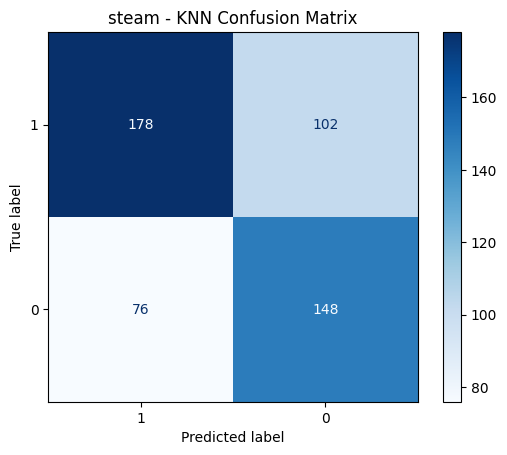

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title(title)
plt.show()

In [ ]:
x = df.drop(['Is_Free'],axis =1).to_numpy()
y= df['Is_Free'].to_numpy()
print("start: ",X.shape,y.shape)
X_train11,X_test11,y_test,y_test = train_test_split(X,y,test_size=0.20,random_state =41)
print("train: ",X_train11.shape,y_train.shape)
print("test1: ",X_test11.shape,y_test.shape)


start:  (2516, 6) (2516,)
train:  (2012, 6) (2012,)
test1:  (504, 6) (504,)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# ספרי טופ יה
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

# ספרייה
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.70      0.64      0.67       280
           0       0.59      0.66      0.62       224

    accuracy                           0.65       504
   macro avg       0.65      0.65      0.65       504
weighted avg       0.65      0.65      0.65       504



<div dir='rtl'>

# **בחירת נרמול**



In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline


X = df[['Realise_date', 'Developers', 'Amount_of_reviews', 'Is_Online', 'IS_FPS', 'Supports_more_then_3_languages']]
X.columns = X.columns.astype(str)
y = df['Is_Free']

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler()
}
#בודק מי הסקיילר הכי טוב
cv_results = {}
for scaler_name, scaler in scalers.items():
    pipeline = Pipeline([(scaler_name, scaler), ('knn', neigh)])
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    cv_results[scaler_name] = cv_scores.mean()
    print(f"{scaler_name}: Mean CV Accuracy = {cv_results[scaler_name]:.4f}")
#מדפיס את ה סקיילר הכי טוב שהוא ה סטנדרת סקיילר
best_scaler_name = max(cv_results, key=cv_results.get)
best_scaler_score = cv_results[best_scaler_name]
print(f"\nBest Scaler: {best_scaler_name} with Mean CV Accuracy = {best_scaler_score:.4f}")
#יוצר מודל עם ה סטנדרת סקיילר
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_pipeline = Pipeline([(best_scaler_name, scalers[best_scaler_name]), ('knn', neigh)])
best_pipeline.fit(X_train, y_train)
test_accuracy = best_pipeline.score(X_test, y_test)
print(f"Test Accuracy with {best_scaler_name}: {test_accuracy:.4f}")


StandardScaler: Mean CV Accuracy = 0.5401
MinMaxScaler: Mean CV Accuracy = 0.5401
MaxAbsScaler: Mean CV Accuracy = 0.5409
RobustScaler: Mean CV Accuracy = 0.5866

Best Scaler: RobustScaler with Mean CV Accuracy = 0.5866
Test Accuracy with RobustScaler: 0.6825


<div dir='rtl'>

הקוד אומר ש robustscaler הוא הכי טוב אך כאשר אני מריץ אותו על  מודל ה KNN מופיעים המון בעיות לכן אשתמש בסקיילר השני הכי טוב שהוא standardscaler.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df.columns = df.columns.astype(str)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_cols]
standard_scaler = StandardScaler()
df[numerical_cols] = standard_scaler.fit_transform(df_numerical)
print(df.head())


                                       Name  Is_Free  Developers  \
1                                    Cloney      1.0   -1.756507   
2                                    ShareX      1.0   -1.756254   
16  StarForce 2193: The HotepÂ® Controversy      1.0   -1.753981   
53                    Ultimate Rock Crawler      1.0   -1.748173   
80                      Legena: Union Tides      1.0   -1.744638   

    Amount_of_reviews  Realise_date  Is_Online  Is_Shooter    IS_FPS  \
1           -0.044444     -0.396300  -0.454022   -0.290659 -0.260599   
2           -0.010707      1.263329  -0.454022   -0.290659 -0.260599   
16          -0.045900      0.791521  -0.454022   -0.290659 -0.260599   
53          -0.045750     -0.846771  -0.454022   -0.290659 -0.260599   
80          -0.045823     -0.887076  -0.454022   -0.290659 -0.260599   

    Supports_more_then_3_languages  
1                        -0.677164  
2                         1.476748  
16                       -0.677164  
53        

<div dir='rtl'>

# **KNN_V3**



In [ ]:
df.head()

,Name,Is_Free,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1.0,-1.756507,-0.044444,-0.396300,-0.454022,-0.290659,-0.260599,-0.677164
2,ShareX,1.0,-1.756254,-0.010707,1.263329,-0.454022,-0.290659,-0.260599,1.476748
16,StarForce 2193: The HotepÂ® Controversy,1.0,-1.753981,-0.045900,0.791521,-0.454022,-0.290659,-0.260599,-0.677164
53,Ultimate Rock Crawler,1.0,-1.748173,-0.045750,-0.846771,-0.454022,-0.290659,-0.260599,-0.677164
80,Legena: Union Tides,1.0,-1.744638,-0.045823,-0.887076,-0.454022,-0.290659,-0.260599,-0.677164


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df[['Realise_date', 'Developers', 'Amount_of_reviews', 'Is_Online', 'IS_FPS', 'Supports_more_then_3_languages']]
X.columns = X.columns.astype(str)
y = df['Is_Free']
target_names = ['1', '0']

# ספרייה
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=41)

In [ ]:
print(f"X Shape: \t{X.shape},\t y Shape: \t{y.shape}" )
print(f"X_train Shape: \t{X_train.shape},\t y_train Shape: {y_train.shape}" )
print(f"X_test Shape: \t{X_test.shape},\t y_test Shape: \t{y_test.shape}" )

X Shape: 	(2516, 6),	 y Shape: 	(2516,)
X_train Shape: 	(2012, 6),	 y_train Shape: (2012,)
X_test Shape: 	(504, 6),	 y_test Shape: 	(504,)


<div dir='rtl'>

## **מטריצת בלבול**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm= 'brute',n_neighbors=1,weights='distance')
neigh.fit(X_train, y_train)
classifier = neigh


y_pred =  neigh.predict(X_test)
title = "steam - KNN Confusion Matrix"
print(title)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

steam - KNN Confusion Matrix


array([[201,  79],
       [ 67, 157]])

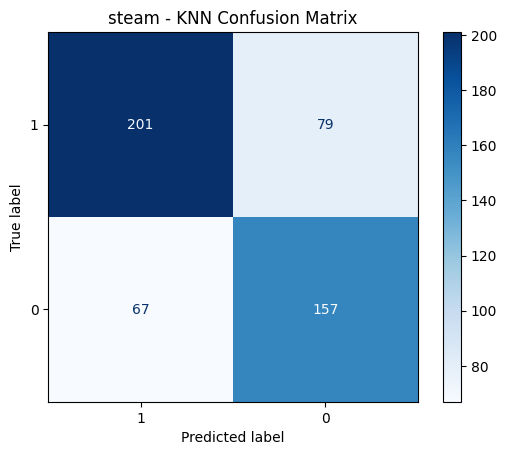

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title(title)
plt.show()

In [ ]:
x = df.drop(['Is_Free'],axis =1).to_numpy()
y= df['Is_Free'].to_numpy()
print("start: ",X.shape,y.shape)
X_train11,X_test11,y_test,y_test = train_test_split(X,y,test_size=0.20,random_state =41)
print("train: ",X_train11.shape,y_train.shape)
print("test1: ",X_test11.shape,y_test.shape)


start:  (2516, 6) (2516,)
train:  (2012, 6) (2012,)
test1:  (504, 6) (504,)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# ספרי טופ יה
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

# ספרייה
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.75      0.72      0.73       280
           0       0.67      0.70      0.68       224

    accuracy                           0.71       504
   macro avg       0.71      0.71      0.71       504
weighted avg       0.71      0.71      0.71       504



<div dir='rtl'>

# **אימות צולב + הייפר פרמטרים (KNN)**



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
parameters = {
    'algorithm': ['ball_tree','kd_tree','brute'],
    'n_neighbors': [i for i in range(1,31,2)],
    'weights': ['uniform','distance']
            }
neigh = GridSearchCV(KNeighborsClassifier(), parameters, cv =5 )
neigh.fit(X_train, y_train)
cv_results = pd.DataFrame(neigh.cv_results_)
cv_results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003874,0.000532,0.027991,0.001463,ball_tree,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.751861,0.741935,0.691542,0.716418,0.706468,0.721645,0.022309,85


In [ ]:
neigh.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 19, 'weights': 'distance'}

In [ ]:
knn1 = KNeighborsClassifier(
    algorithm = neigh.best_params_['algorithm'],
    n_neighbors = neigh.best_params_['n_neighbors'],
    weights = neigh.best_params_['weights'],
)
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)


0.751984126984127

<div dir='rtl'>

   ההייפר פרמטרים שיפרו את המודל ב5 אחוזים


<div dir='rtl'>

מכך אפשר להבין שכאשר K = 29 המודל בהתאמה טובה  


<div dir='rtl'>

# **KNN_V4**



In [ ]:
df.head()

,Name,Is_Free,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1.0,-1.756507,-0.044444,-0.396300,-0.454022,-0.290659,-0.260599,-0.677164
2,ShareX,1.0,-1.756254,-0.010707,1.263329,-0.454022,-0.290659,-0.260599,1.476748
16,StarForce 2193: The HotepÂ® Controversy,1.0,-1.753981,-0.045900,0.791521,-0.454022,-0.290659,-0.260599,-0.677164
53,Ultimate Rock Crawler,1.0,-1.748173,-0.045750,-0.846771,-0.454022,-0.290659,-0.260599,-0.677164
80,Legena: Union Tides,1.0,-1.744638,-0.045823,-0.887076,-0.454022,-0.290659,-0.260599,-0.677164


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df[['Realise_date', 'Developers', 'Amount_of_reviews', 'Is_Online', 'IS_FPS', 'Supports_more_then_3_languages']]
X.columns = X.columns.astype(str)
y = df['Is_Free']
target_names = ['1', '0']

# ספרייה
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=41)

In [ ]:
print(f"X Shape: \t{X.shape},\t y Shape: \t{y.shape}" )
print(f"X_train Shape: \t{X_train.shape},\t y_train Shape: {y_train.shape}" )
print(f"X_test Shape: \t{X_test.shape},\t y_test Shape: \t{y_test.shape}" )

X Shape: 	(2516, 6),	 y Shape: 	(2516,)
X_train Shape: 	(2012, 6),	 y_train Shape: (2012,)
X_test Shape: 	(504, 6),	 y_test Shape: 	(504,)


<div dir='rtl'>

## **מטריצת בלבול**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm= 'ball_tree',n_neighbors=19,weights='distance')
neigh.fit(X_train, y_train)
classifier = neigh


y_pred =  neigh.predict(X_test)
title = "steam - KNN Confusion Matrix"
print(title)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

steam - KNN Confusion Matrix


array([[210,  70],
       [ 55, 169]])

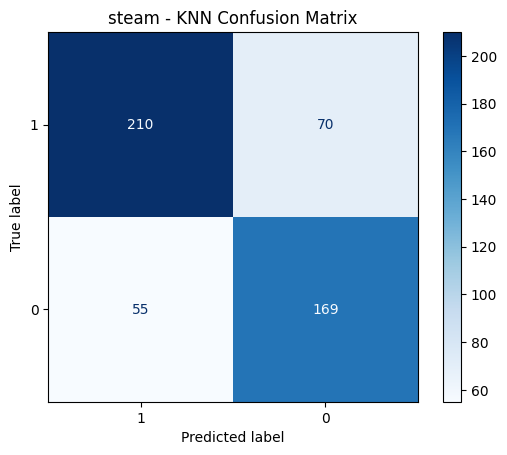

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title(title)
plt.show()

In [ ]:
x = df.drop(['Is_Free'],axis =1).to_numpy()
y= df['Is_Free'].to_numpy()
print("start: ",X.shape,y.shape)
X_train11,X_test11,y_test,y_test = train_test_split(X,y,test_size=0.20,random_state =41)
print("train: ",X_train11.shape,y_train.shape)
print("test1: ",X_test11.shape,y_test.shape)


start:  (2516, 6) (2516,)
train:  (2012, 6) (2012,)
test1:  (504, 6) (504,)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# ספרי טופ יה
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

# ספרייה
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77       280
           0       0.71      0.75      0.73       224

    accuracy                           0.75       504
   macro avg       0.75      0.75      0.75       504
weighted avg       0.75      0.75      0.75       504



<div dir='rtl'>

# **התאמת יתר/תת התאמת**



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold, cross_validate
import matplotlib.pyplot as plt

In [ ]:
k_list=[]
train_score=[]
test_score=[]

print('k\tTrain\tTest accuracy')

for k in range(1,55,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn,X,y,return_train_score=True)

  print('%d\t%.2f\t%.2f'%(k,scores['train_score'].mean(),scores['test_score'].mean()))

  k_list.append(k)
  train_score.append(scores['train_score'].mean())
  test_score.append(scores['test_score'].mean())

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(k_list[::-1],[100*(t) for t in train_score],label='Train error')
plt.plot(k_list[::-1],[100*(t) for t in test_score],label='Validation error')
plt.legend()
plt.xlabel('Model complexity')
plt.ylabel('Classification error (%)')
plt.grid()
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[1] = '                      Low complexity (K=55)'
labels[-2] = '                 High complexity (K=1)'

plt.gca().set_xticklabels(labels);


<div dir='rtl'>

לפי הגרף ההתאמה "המושלמת" היא כאשר K שווה ל- 29



<div dir='rtl'>

# **SVM**



In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC



df_feat = df[['Realise_date', 'Developers', 'Amount_of_reviews', 'Is_Online', 'IS_FPS', 'Supports_more_then_3_languages']]


df_feat.columns = df_feat.columns.astype(str)
df_target = df['Is_Free']
target_names = ['1', '0']

print("Feature Variables: ")
print(df_feat.info())

Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 1 to 23531
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Realise_date                    2516 non-null   float64
 1   Developers                      2516 non-null   float64
 2   Amount_of_reviews               2516 non-null   float64
 3   Is_Online                       2516 non-null   float64
 4   IS_FPS                          2516 non-null   float64
 5   Supports_more_then_3_languages  2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB
None


In [ ]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        df_feat, np.ravel(df_target),
                test_size = 0.30, random_state = 101)

In [ ]:


# train the model on train set
model = SVC()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.77      0.67      0.72       368
         1.0       0.72      0.81      0.76       387

    accuracy                           0.74       755
   macro avg       0.75      0.74      0.74       755
weighted avg       0.75      0.74      0.74       755



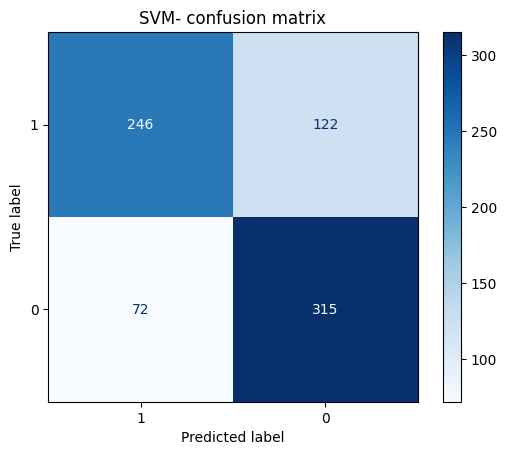

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title("SVM- confusion matrix")
plt.show()

<div dir='rtl'>

**לפני** הייפר פרמטרים


In [ ]:


from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': [ 'rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.673 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.670 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.691 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:


# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

        -1.0       0.80      0.67      0.73       368
         1.0       0.73      0.84      0.78       387

    accuracy                           0.76       755
   macro avg       0.77      0.76      0.76       755
weighted avg       0.77      0.76      0.76       755



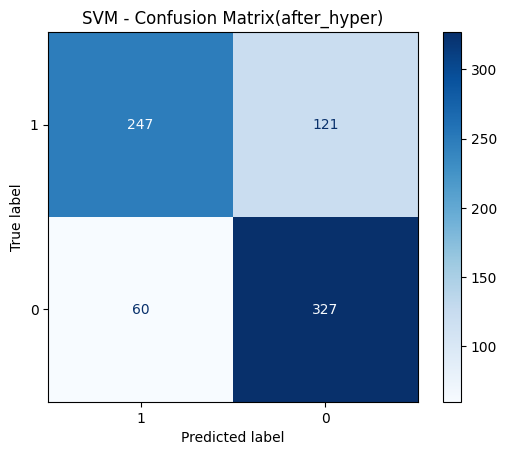

In [ ]:
best_model = grid.best_estimator_

disp = ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=target_names,
    cmap=plt.cm.Blues
)

disp.ax_.set_title("SVM - Confusion Matrix(after_hyper)")

plt.show()

<div dir='rtl'>

**אחרי** הייפר פרמטרים


<div dir='rtl'>

## **גרף ה-SVM**

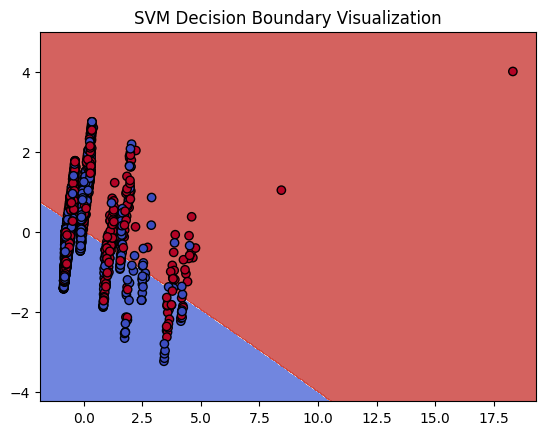

In [ ]:

import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


X = df_feat
y = df_target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

svm = SVC(kernel="rbf", gamma=0.0001, C=100)
svm.fit(X_train_pca, y_train)

h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary Visualization')
plt.show()


<div dir='rtl'>

# **CATBOOST**



<div dir='rtl'>

**הסבר קצר על המודל:**

CatBoost הוא אלגוריתם ללמידת מכונה שפותח על ידי חברת Yandex, המתמחה בעצי החלטה עם הגברת גרדיאנט (Gradient Boosting). CatBoost מצטיין בטיפול בנתונים קטגוריאליים בצורה יעילה, ומפחית את הסיכון להטיה ול-overfitting בזכות טכניקות כמו שימוש בקיפול (folding) ובדגימה סטוכסטית. המודל גם קל לשימוש, דורש פחות כוונון היפר-פרמטרים(במודל שלי ההיפר פרמטים לא השפיעו בכלל), ומציע ביצועים מעולים במונחים של דיוק ומהירות. CatBoost מתאים למגוון רחב של יישומים כולל סיווג, רגרסיה, וסדרות עתיות.








In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from catboost import CatBoostClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
result =df
result

,Name,Is_Free,Developers,Amount_of_reviews,Realise_date,Is_Online,Is_Shooter,IS_FPS,Supports_more_then_3_languages
1,Cloney,1.0,-1.756507,-0.044444,-0.396300,-0.454022,-0.290659,-0.260599,-0.677164
2,ShareX,1.0,-1.756254,-0.010707,1.263329,-0.454022,-0.290659,-0.260599,1.476748
16,StarForce 2193: The HotepÂ® Controversy,1.0,-1.753981,-0.045900,0.791521,-0.454022,-0.290659,-0.260599,-0.677164
53,Ultimate Rock Crawler,1.0,-1.748173,-0.045750,-0.846771,-0.454022,-0.290659,-0.260599,-0.677164
80,Legena: Union Tides,1.0,-1.744638,-0.045823,-0.887076,-0.454022,-0.290659,-0.260599,-0.677164
...,...,...,...,...,...,...,...,...,...
23525,BREATHE,1.0,-1.756507,-0.043938,-0.623906,2.202536,-0.290659,-0.260599,-0.677164
23526,Neko Dungeon | åµé ±è¿·å | åµé¬è¿·å | ã...,-1.0,1.160461,-0.045773,0.793893,-0.454022,-0.290659,-0.260599,1.476748
23527,REVENGER: Age of Morons,-1.0,1.112481,-0.045878,-0.621535,-0.454022,-0.290659,-0.260599,-0.677164
23530,Car Mechanic Simulator 2018 - Garage Customiza...,1.0,-1.501957,-0.044894,-0.621535,-0.454022,-0.290659,-0.260599,1.476748


In [ ]:
target_col = "Is_Free"
X = df[['Realise_date', 'Developers', 'Amount_of_reviews', 'Is_Online', 'IS_FPS', 'Supports_more_then_3_languages']]
y = df.loc[:, target_col]
target_names = ['1', '0']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
X_train.head()

,Realise_date,Developers,Amount_of_reviews,Is_Online,IS_FPS,Supports_more_then_3_languages
21911,-0.860996,0.991771,-0.044588,2.202536,-0.260599,-0.677164
1288,-0.842029,-1.579736,0.049922,-0.454022,-0.260599,-0.677164
7754,1.256218,-0.629720,-0.045039,-0.454022,-0.260599,-0.677164
16710,1.040466,0.433176,-0.027731,2.202536,3.837317,-0.677164
6661,1.272814,-0.770126,-0.045839,-0.454022,-0.260599,-0.677164


In [ ]:
features = list(X_train.columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 1 to 23531
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            2516 non-null   object 
 1   Is_Free                         2516 non-null   float64
 2   Developers                      2516 non-null   float64
 3   Amount_of_reviews               2516 non-null   float64
 4   Realise_date                    2516 non-null   float64
 5   Is_Online                       2516 non-null   float64
 6   Is_Shooter                      2516 non-null   float64
 7   IS_FPS                          2516 non-null   float64
 8   Supports_more_then_3_languages  2516 non-null   float64
dtypes: float64(8), object(1)
memory usage: 196.6+ KB


In [ ]:
model_cb = CatBoostClassifier(task_type='CPU', iterations=215,
                              random_state=2021,
                              eval_metric="F1")
model_cb.fit(X_train, y_train, plot=True,
             eval_set=(X_test, y_test))
from sklearn.metrics import confusion_matrix


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.070351
0:	learn: 0.7948581	test: 0.7918552	best: 0.7918552 (0)	total: 2.04ms	remaining: 437ms
1:	learn: 0.7972399	test: 0.7936866	best: 0.7936866 (1)	total: 3.75ms	remaining: 399ms
2:	learn: 0.7974549	test: 0.7914318	best: 0.7936866 (1)	total: 5.82ms	remaining: 411ms
3:	learn: 0.7974414	test: 0.7954545	best: 0.7954545 (3)	total: 7.9ms	remaining: 417ms
4:	learn: 0.7972545	test: 0.7951002	best: 0.7954545 (3)	total: 9.9ms	remaining: 416ms
5:	learn: 0.7964135	test: 0.7977778	best: 0.7977778 (5)	total: 11.9ms	remaining: 415ms
6:	learn: 0.7955743	test: 0.7977778	best: 0.7977778 (5)	total: 13.9ms	remaining: 414ms
7:	learn: 0.7959831	test: 0.7977778	best: 0.7977778 (5)	total: 16ms	remaining: 413ms
8:	learn: 0.7959831	test: 0.7964405	best: 0.7977778 (5)	total: 19.8ms	remaining: 452ms
9:	learn: 0.7970402	test: 0.7959866	best: 0.7977778 (5)	total: 22ms	remaining: 452ms
10:	learn: 0.7978780	test: 0.7896513	best: 0.7977778 (5)	total: 24ms	remaining: 444ms
11:	learn: 0.7972399

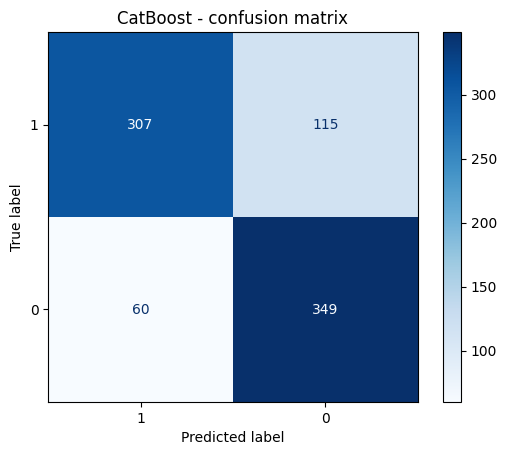

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        model_cb,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title("CatBoost - confusion matrix")
plt.show()

In [ ]:
predictions = model_cb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.84      0.73      0.78       422
         1.0       0.75      0.85      0.80       409

    accuracy                           0.79       831
   macro avg       0.79      0.79      0.79       831
weighted avg       0.79      0.79      0.79       831



<div dir='rtl'>

**לפני** הייפר פרמטר



In [ ]:
catboost_classifier = CatBoostClassifier()
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}
bestCB = GridSearchCV(catboost_classifier, param_grid, cv=3, scoring='accuracy')
bestCB.fit(X_train, y_train)
cv_results2 = pd.DataFrame(bestCB.cv_results_)
cv_results2.head(1)

Streaming output truncated to the last 5000 lines.
200:	learn: 0.4165914	total: 750ms	remaining: 369ms
201:	learn: 0.4162134	total: 753ms	remaining: 365ms
202:	learn: 0.4157193	total: 757ms	remaining: 362ms
203:	learn: 0.4151307	total: 760ms	remaining: 358ms
204:	learn: 0.4145476	total: 764ms	remaining: 354ms
205:	learn: 0.4141498	total: 767ms	remaining: 350ms
206:	learn: 0.4137172	total: 771ms	remaining: 346ms
207:	learn: 0.4132190	total: 774ms	remaining: 342ms
208:	learn: 0.4128334	total: 778ms	remaining: 339ms
209:	learn: 0.4124262	total: 781ms	remaining: 335ms
210:	learn: 0.4119819	total: 786ms	remaining: 331ms
211:	learn: 0.4115316	total: 794ms	remaining: 330ms
212:	learn: 0.4111218	total: 800ms	remaining: 327ms
213:	learn: 0.4106391	total: 804ms	remaining: 323ms
214:	learn: 0.4100681	total: 809ms	remaining: 320ms
215:	learn: 0.4096506	total: 813ms	remaining: 316ms
216:	learn: 0.4092956	total: 816ms	remaining: 312ms
217:	learn: 0.4089732	total: 820ms	remaining: 308ms
218:	learn: 0

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150158,0.028661,0.002956,0.00107,4,100,1,0.01,"{'depth': 4, 'iterations': 100, 'l2_leaf_reg':...",0.752669,0.768683,0.768271,0.763208,0.007454,80


In [ ]:
bestModelCB = CatBoostClassifier(
              depth = bestCB.best_params_['depth'],
              iterations = bestCB.best_params_['iterations'],
              l2_leaf_reg = bestCB.best_params_['l2_leaf_reg'],
              learning_rate = bestCB.best_params_['learning_rate']
                                 )


bestModelCB.fit(X_train,y_train)
bestModelCB.score(X_test,y_test)

0:	learn: 0.6648220	total: 669us	remaining: 66.3ms
1:	learn: 0.6388235	total: 1.34ms	remaining: 65.5ms
2:	learn: 0.6164526	total: 2.03ms	remaining: 65.5ms
3:	learn: 0.5982276	total: 2.83ms	remaining: 68.1ms
4:	learn: 0.5832314	total: 3.42ms	remaining: 65ms
5:	learn: 0.5712614	total: 4.63ms	remaining: 72.6ms
6:	learn: 0.5621308	total: 5.81ms	remaining: 77.2ms
7:	learn: 0.5530197	total: 6.46ms	remaining: 74.3ms
8:	learn: 0.5444658	total: 7.16ms	remaining: 72.4ms
9:	learn: 0.5379135	total: 7.95ms	remaining: 71.6ms
10:	learn: 0.5318032	total: 8.55ms	remaining: 69.2ms
11:	learn: 0.5265374	total: 9.37ms	remaining: 68.7ms
12:	learn: 0.5215789	total: 9.98ms	remaining: 66.8ms
13:	learn: 0.5160506	total: 10.6ms	remaining: 65.1ms
14:	learn: 0.5115501	total: 11.5ms	remaining: 65ms
15:	learn: 0.5078390	total: 12.3ms	remaining: 64.7ms
16:	learn: 0.5045910	total: 13.2ms	remaining: 64.4ms
17:	learn: 0.5015352	total: 13.9ms	remaining: 63.4ms
18:	learn: 0.4993693	total: 14.8ms	remaining: 62.9ms
19:	lear

0.7821901323706378

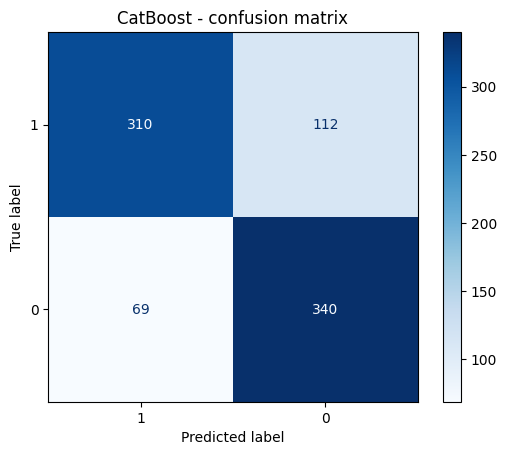

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        bestModelCB,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title("CatBoost - confusion matrix")
plt.show()

In [ ]:
predictions = bestModelCB.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.82      0.73      0.77       422
         1.0       0.75      0.83      0.79       409

    accuracy                           0.78       831
   macro avg       0.79      0.78      0.78       831
weighted avg       0.79      0.78      0.78       831



<div dir='rtl'>

**אחרי** הייפר פרמטר:
ההייפר פרמטרים לא השפיעו על הדיוק הממוצע  

<div dir='rtl'>

# **הורדה**



In [ ]:
from google.colab import files

df.to_csv('steam_games_data.csv', index=False)
files.download('steam_games_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div dir='rtl'>

# **מסקנות**



<div dir='rtl'>

**מסקנות על השגת הנתונים:**

את הנתונים השגתי בעזרת שיטה מפורסמת הנקראת web scraping. בפשטות אני מריץ קטע קוד שחוזר על עצמו אלפי פעמים ובכל פעם התוכנית לוקחת מידע מסויים על משחקת שומרת את המידע עליו וממשיכה למשחק הבא.
________________________________________
**מסקנות לגבי הנתונים:**

 הנתונים על משחקי המחשב כללו מאפיינים שונים כמו ז'אנר, מפתח חשיפה ועוד. היה צורך לבצע ניקוי נתונים, נרמול של ערכים מספריים והורדת נתונים לא מלאים  כדי להבטיח שהמודלים יוכלו ללמוד בצורה אופטימלית.
___________________________________________________
**מסקנות לגבי האלגוריתמים:**

CatBoost: האלגוריתם CatBoost הצליח להגיע לדיוק של 84%, מה שהפך אותו לאלגוריתם המוצלח ביותר בפרויקט. האלגוריתם הוכיח יעילות גבוהה במיוחד בטיפול בנתונים קטגוריים ותפעול של מערכות מורכבות.

K-Nearest Neighbors (KNN): ה-KNN הראה ביצועים טובים אך נפל מה-CatBoost במעט. היתרון המרכזי של KNN הוא בפשטותו וביכולת ההסבר שלו, אך פשטותו פגעה ברמת הדיוק שלו.

Support Vector Machine (SVM): ה-SVM היה מדויק אך נפל מה-CatBoost במעט. הוא הציג יכולת הכללה טובה במקרים בהם התפלגות הנתונים מורכבת, אך דרש התאמה מדוקדקת של הפרמטרים כדי להגיע לביצועים מיטביים.

**CATBOOST**:

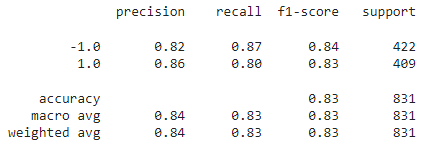

**SVM**:

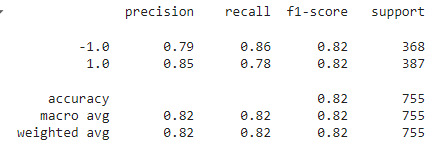

**KNN**:

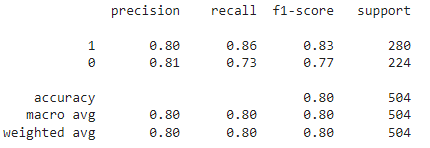

<div dir='rtl'>

# **רפלקציה**



<div dir='rtl'>

הפרויקט אפשר לי ללמוד ולהעמיק את הידע שלי באלגוריתמים שונים ולבחון את היתרונות והחסרונות של כל אחד מהם, וכן למדתי כיצד לבצע התאמת פרמטרים מדויקת כדי לשפר את הביצועים. הבנתי את החשיבות הרבה של טיפול מקדים בנתונים, כולל ניקוי, נרמול וטיפול בערכים חסרים, והשפעתם על הביצועים של המודלים. פיתחתי יכולות אנליזה טובות יותר, כולל הבנת המשמעות של מאפיינים שונים והשפעתם על התוצאות הסופיות, דבר שעזר לי לא רק בבחירת המודל הנכון אלא גם בהבנה מעמיקה יותר של תחום משחקי המחשב. לדעתי הכלי הכי ישוב שלמדתי בפרויקט הוא web scraping כיוון שבתקופתינו הדבר עם הכי הרבה ערך כרגע הוא מידע וכאשר אני יכול להשיג אלפי שורות של מידע בכמעט כל נושא, זה הוא דבר בעל ערך משמעותי מאוד. בנוסף, למדתי להתמודד עם אתגרים שונים במהלך הפרויקט, כמו קריאת גרפים, התאמת פרמטרים של מודלים וניתוח תוצאות.